In [11]:
import os
import librosa # Lo usaremos para el analisis y procesamiento de audio
import IPython.display as ipd # para reproducir audio en el notebook
from IPython.display import Audio # para poder reproducir audio dentro del notebook
import matplotlib.pyplot as plt 
import numpy as np
from scipy.io import wavfile # para escribir o leer audios
import warnings 
import py7zr # para comprimir descomprimir archivos

In [9]:
from pyunpack import Archive

os.makedirs("./data", exist_ok=True)
Archive("C:/kaggle/input/tensorflow-speech-recognition-challenge/train.7z").extractall("./data", patool_path="C:/Users/KATANA/anaconda3/Scripts/patool.exe")
print("Extraido!")

Extraido!


In [2]:
train_dir = "./data/train/audio/"

classes = os.listdir(train_dir)


In [3]:
classes

['bed',
 'bird',
 'cat',
 'dog',
 'down',
 'eight',
 'five',
 'four',
 'go',
 'happy',
 'house',
 'left',
 'marvin',
 'nine',
 'no',
 'off',
 'on',
 'one',
 'right',
 'seven',
 'sheila',
 'six',
 'stop',
 'three',
 'tree',
 'two',
 'up',
 'wow',
 'yes',
 'zero',
 '_background_noise_']

In [4]:
classes.remove("_background_noise_")

In [5]:
classes

['bed',
 'bird',
 'cat',
 'dog',
 'down',
 'eight',
 'five',
 'four',
 'go',
 'happy',
 'house',
 'left',
 'marvin',
 'nine',
 'no',
 'off',
 'on',
 'one',
 'right',
 'seven',
 'sheila',
 'six',
 'stop',
 'three',
 'tree',
 'two',
 'up',
 'wow',
 'yes',
 'zero']

In [6]:
samples, sample_rate = librosa.load(train_dir + "yes/0a7c2a8d_nohash_0.wav", sr = 16000)

In [16]:
samples

array([ 0.00042725, -0.00021362, -0.00042725, ...,  0.00057983,
        0.00061035,  0.00082397], dtype=float32)

In [17]:
sample_rate

16000

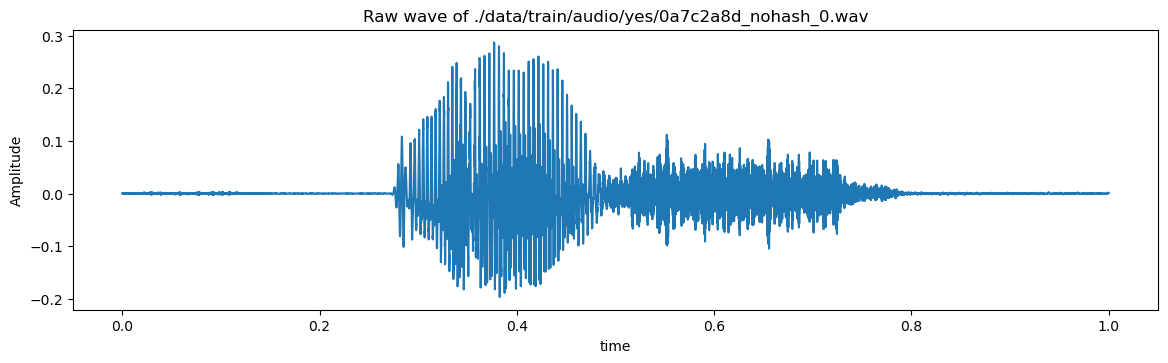

In [9]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + './data/train/audio/yes/0a7c2a8d_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

Audio(data=samples, rate=sample_rate)

In [13]:
ipd.Audio(samples, rate=sample_rate)

In [15]:
print(sample_rate)

16000


In [18]:
samples = librosa.resample(samples, orig_sr=sample_rate, target_sr=8000)
ipd.Audio(samples, rate=8000)

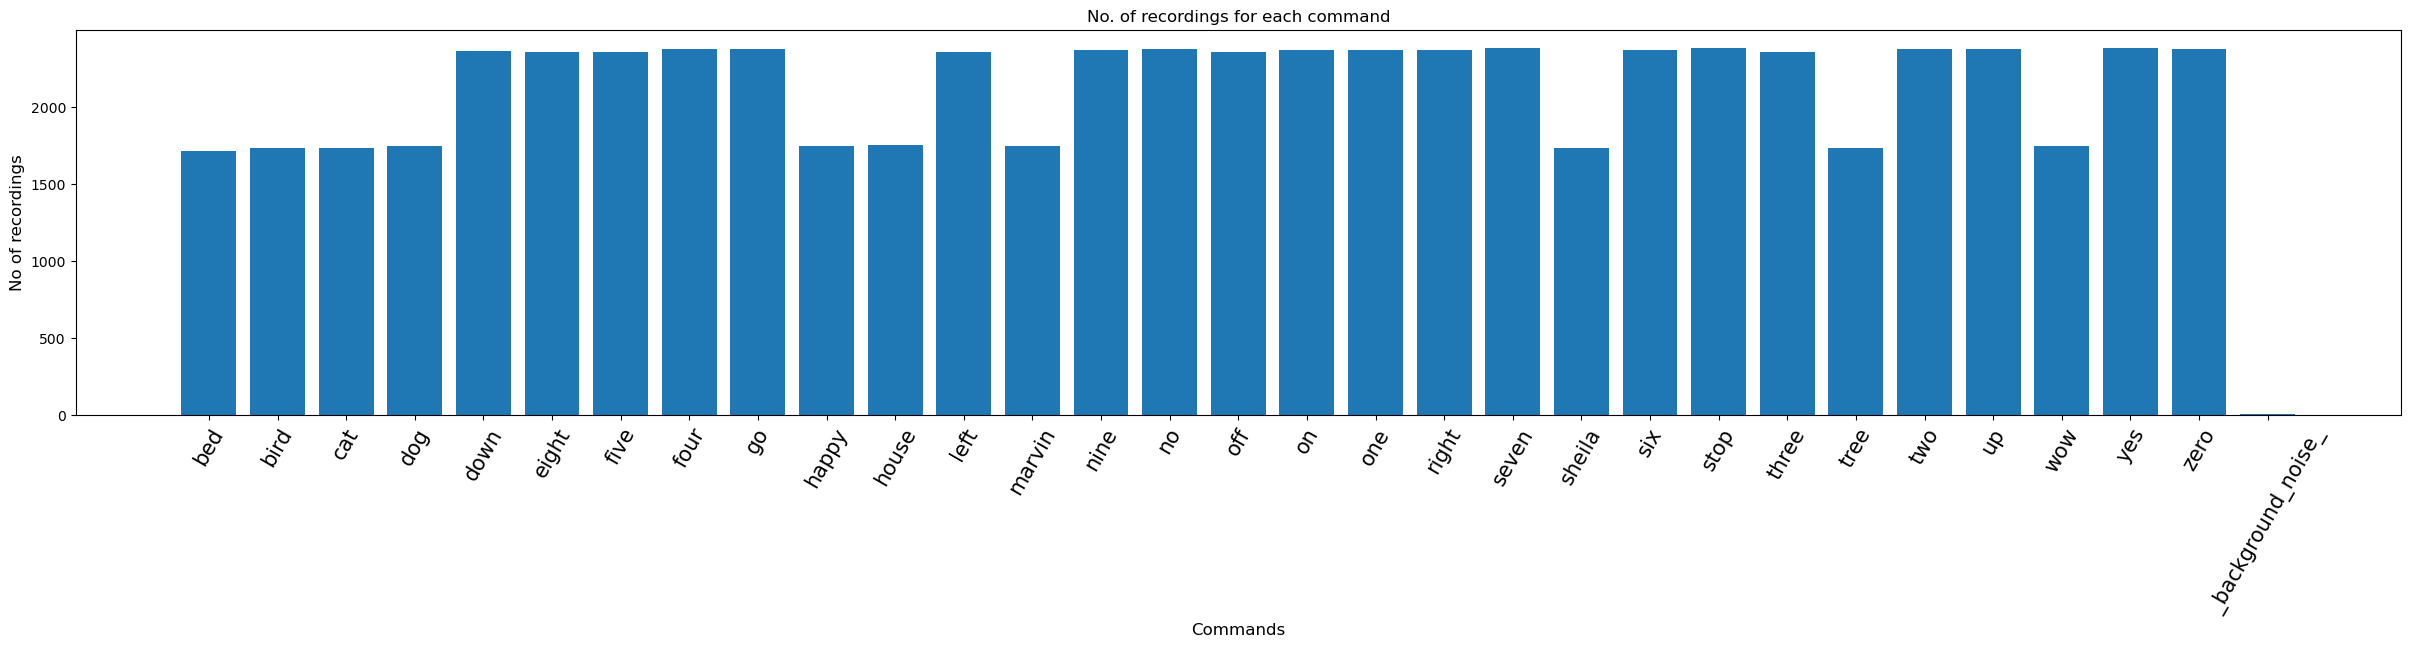

In [19]:
labels = os.listdir(train_dir) # Lista de carpetas

no_of_recordings = [] # Numero de grabaciones
for label in labels:
    waves = [f for f in os.listdir(train_dir + '/'+ label) if f.endswith('.wav')] # Lista de archivos .wav
    no_of_recordings.append(len(waves)) # Numero de grabaciones por carpeta
    
plt.figure(figsize=(30,5)) # Tamaño de la figura
index = np.arange(len(labels)) # Rango de las etiquetas
plt.bar(index, no_of_recordings) # Grafico de barras
plt.xlabel('Commands', fontsize=12) 
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

labels = ["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]

(array([1.5000e+01, 3.0000e+01, 4.4000e+01, 1.3800e+02, 1.3600e+02,
        1.7900e+02, 3.6600e+02, 4.3400e+02, 5.9300e+02, 2.1747e+04]),
 array([0.418 , 0.4762, 0.5344, 0.5926, 0.6508, 0.709 , 0.7672, 0.8254,
        0.8836, 0.9418, 1.    ]),
 <BarContainer object of 10 artists>)

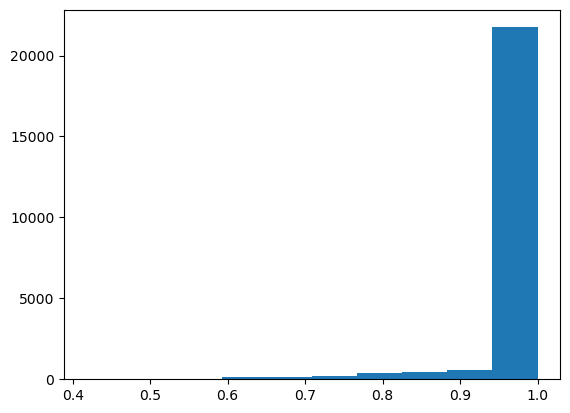

In [20]:
duration_of_recordings = [] # Duracion de las grabaciones
for label in labels:
    waves = [f for f in os.listdir(train_dir + '/'+ label) if f.endswith('.wav')] # Lista de archivos .wav
    for wav in waves:       
        sample_rate, samples = wavfile.read(train_dir + '/' + label + '/' + wav) # Leer el archivo .wav
        duration_of_recordings.append(float(len(samples)/sample_rate)) # Duracion de la grabacion

plt.hist(np.array(duration_of_recordings)) # Histograma

El histograma anterior muestra que la mayoria de las grabaciones tienen una duracion de 1 segundo. Por lo tanto, podemos considerar 1 segundo como la duracion de las grabaciones.

In [21]:
train_dir = "./data/train/audio/"

classes = os.listdir(train_dir)
classes.remove("_background_noise_")

all_waves = [] # Lista de todas las grabaciones
all_labels = [] # Lista de todas las etiquetas

for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_dir + '/'+ label) if f.endswith('.wav')] # Lista de archivos .wav
    for wav in waves:
        samples, sample_rate = librosa.load(train_dir + '/' + label + '/' + wav, sr = 16000) # Cargar el archivo .wav
        samples = librosa.resample(samples, orig_sr=sample_rate, target_sr=8000)
        if(len(samples)== 8000): 
            all_waves.append(samples)
            all_labels.append(label)

yes
no
up
down
left
right
on
off
stop
go


In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(all_labels) # Codificar las etiquetas
classes = list(le.classes_) # Clases

In [24]:
import tensorflow as tf

num_clases = len(classes) # Numero de clases
y_categorical = tf.keras.utils.to_categorical(y, num_clases) # Codificar las etiquetas

In [25]:
y_categorical

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
all_waves = np.array(all_waves).reshape(-1,8000,1) # Convertir a un array de numpy

In [27]:
all_waves

array([[[-2.8755555e-03],
        [-4.1057649e-03],
        [-3.2389332e-03],
        ...,
        [-7.3491666e-04],
        [-1.1149184e-03],
        [-1.3062113e-03]],

       [[ 4.0267472e-04],
        [ 6.2703103e-04],
        [ 3.6663652e-04],
        ...,
        [ 8.1658724e-04],
        [ 4.8109778e-04],
        [ 7.1751053e-04]],

       [[-1.6331184e-04],
        [-1.7523754e-04],
        [-1.1909311e-04],
        ...,
        [ 4.3113958e-04],
        [ 3.3222663e-04],
        [ 3.0596263e-04]],

       ...,

       [[-1.5254016e-04],
        [-2.1424750e-04],
        [-1.7401384e-04],
        ...,
        [ 4.8047554e-04],
        [ 3.1054759e-04],
        [ 2.9710721e-04]],

       [[-5.8629550e-05],
        [-1.6690046e-04],
        [-1.7981464e-04],
        ...,
        [ 1.0045746e-04],
        [-4.7811842e-05],
        [-1.1948359e-04]],

       [[ 1.6037637e-04],
        [ 4.5653980e-04],
        [ 3.7390710e-04],
        ...,
        [ 3.8838174e-05],
        [-1.136

In [28]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_waves),np.array(y_categorical),stratify=y_categorical,test_size = 0.2,random_state=777,shuffle=True) # Dividir el dataset en entrenamiento y validacion

In [29]:
x_tr.shape

(17049, 8000, 1)

In [30]:
x_val.shape

(4263, 8000, 1)

In [31]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K

K.clear_session()

inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs) # Capa de convolucion
conv = MaxPooling1D(3)(conv) # Capa de pooling
conv = Dropout(0.3)(conv) # Capa de dropout

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(num_clases, activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8000, 1)]         0         
                                                                 
 conv1d (Conv1D)             (None, 7988, 8)           112       
                                                                 
 max_pooling1d (MaxPooling1  (None, 2662, 8)           0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 2662, 8)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 2652, 16)          1424      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 884, 16)           0         
 g1D)                                                      

In [32]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001)

In [34]:
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [35]:
history=model.fit(x_tr, y_tr ,epochs=100, callbacks=[es,mc], batch_size=32, validation_data=(x_val,y_val))

Epoch 1/100


533/533 [==============================] - 17s 28ms/step - loss: 1.9128 - accuracy: 0.2890 - val_loss: 1.6068 - val_accuracy: 0.3978
Epoch 2/100
533/533 [==============================] - 11s 20ms/step - loss: 1.3464 - accuracy: 0.5252 - val_loss: 1.1229 - val_accuracy: 0.6319
Epoch 3/100
533/533 [==============================] - 10s 19ms/step - loss: 1.0181 - accuracy: 0.6529 - val_loss: 0.7936 - val_accuracy: 0.7401
Epoch 4/100
533/533 [==============================] - 11s 20ms/step - loss: 0.8703 - accuracy: 0.7034 - val_loss: 0.7505 - val_accuracy: 0.7387
Epoch 5/100
533/533 [==============================] - 11s 20ms/step - loss: 0.7719 - accuracy: 0.7373 - val_loss: 0.6826 - val_accuracy: 0.7835
Epoch 6/100
533/533 [==============================] - 11s 20ms/step - loss: 0.7126 - accuracy: 0.7574 - val_loss: 0.6510 - val_accuracy: 0.7872
Epoch 7/100
533/533 [==============================] - 11s 21ms/step - loss: 0.6501 - accuracy: 0.7759 - val_loss: 0.6218 - val_

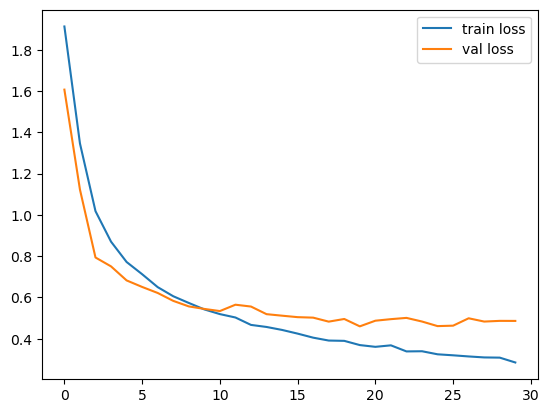

In [36]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

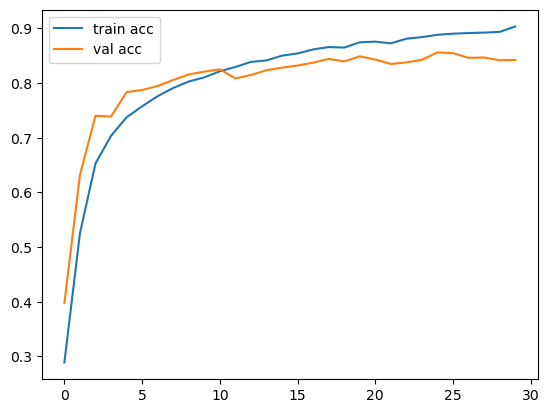

In [37]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [38]:
def predict(audio):
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]

In [39]:
import random
index=random.randint(0,len(x_val)-1)
samples=x_val[index].ravel()
print("Audio:",classes[np.argmax(y_val[index])])
ipd.Audio(samples, rate=8000)
print("Texto:",predict(samples))

Audio: on
1/1 [==============================] - 0s 128ms/step
Texto: on


Audio: yes


1/1 [==============================] - 0s 18ms/step
Text: yes
134/134 [==============================] - 1s 4ms/step


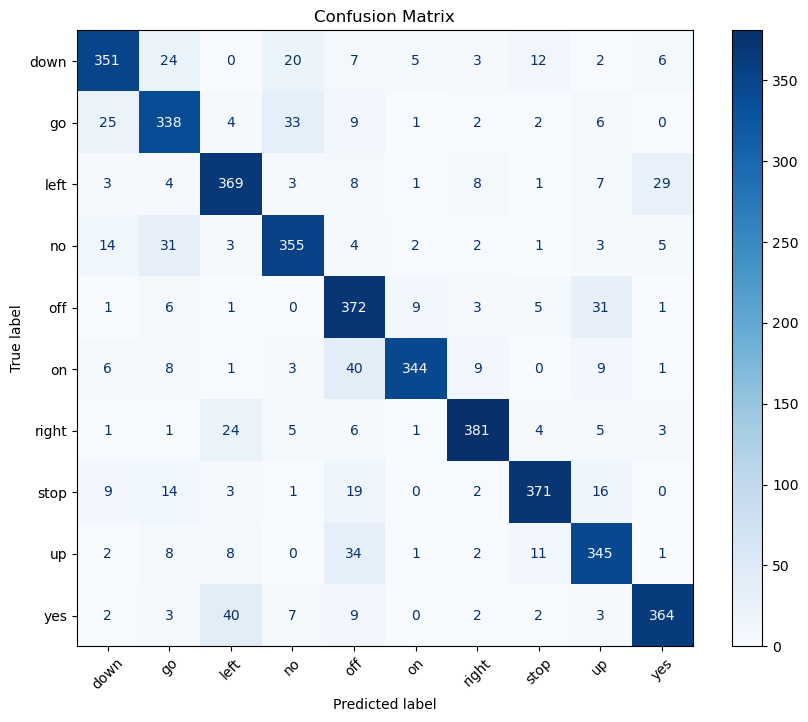

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

index = random.randint(0, len(x_val) - 1)
samples = x_val[index].ravel()
print("Audio:", classes[np.argmax(y_val[index])])
display(Audio(samples, rate=8000))
print("Text:", predict(samples))

# Get predictions for the entire validation set
y_pred = np.argmax(model.predict(x_val), axis=1)
y_true = np.argmax(y_val, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=np.arange(len(classes)))

fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=45)
plt.title("Confusion Matrix")
plt.show()

In [43]:
model.save("model.h5")

C:\Users\KATANA\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [44]:
model.save("model.keras")